In [182]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [183]:
data  = pd.read_csv('2988741.csv',index_col='DATE')
data.head(3)

,STATION,NAME,PRCP,TAVG,TMAX,TMIN
DATE,,,,,,
1970-01-01,IN012070300,"BOMBAY COLABA OBSERVATORY SR, IN",0.0,NaN,NaN,NaN
1970-01-02,IN012070300,"BOMBAY COLABA OBSERVATORY SR, IN",0.0,NaN,NaN,NaN
1970-01-03,IN012070300,"BOMBAY COLABA OBSERVATORY SR, IN",0.0,NaN,NaN,NaN


In [184]:
data.shape

(22100, 6)

In [185]:
data.isnull().sum()/data.shape[0]

STATION    0.000000
NAME       0.000000
PRCP       0.281312
TAVG       0.194027
TMAX       0.411312
TMIN       0.379819
dtype: float64

In [186]:
core_data = data[['PRCP','TMAX','TMIN']]

In [187]:
core_data.columns = ['Precip','Max_Temp','Min_Temp']

In [188]:
core_data.isnull().sum()/core_data.shape[0]

Precip      0.281312
Max_Temp    0.411312
Min_Temp    0.379819
dtype: float64

In [189]:
core_data.dtypes

Precip      float64
Max_Temp    float64
Min_Temp    float64
dtype: object

In [190]:
core_data.index

Index(['1970-01-01', '1970-01-02', '1970-01-03', '1970-01-04', '1970-01-05',
       '1970-01-06', '1970-01-07', '1970-01-08', '1970-01-09', '1970-01-10',
       ...
       '1970-12-22', '1970-12-23', '1970-12-24', '1970-12-25', '1970-12-26',
       '1970-12-27', '1970-12-28', '1970-12-29', '1970-12-30', '1970-12-31'],
      dtype='object', name='DATE', length=22100)

In [191]:
core_data.index = pd.to_datetime(core_data.index)

In [192]:
core_data.index

DatetimeIndex(['1970-01-01', '1970-01-02', '1970-01-03', '1970-01-04',
               '1970-01-05', '1970-01-06', '1970-01-07', '1970-01-08',
               '1970-01-09', '1970-01-10',
               ...
               '1970-12-22', '1970-12-23', '1970-12-24', '1970-12-25',
               '1970-12-26', '1970-12-27', '1970-12-28', '1970-12-29',
               '1970-12-30', '1970-12-31'],
              dtype='datetime64[ns]', name='DATE', length=22100, freq=None)

In [193]:
core_data.index.year.value_counts().sort_index()

1970    4288
1973     350
1974     360
1975     350
1976     351
1977     361
1978     363
1979     364
1980     365
1981     364
1982     365
1983     365
1984     366
1985     365
1986     365
1987     363
1988     358
1989     362
1990     360
1991     364
1992     366
1993     364
1994     363
1995     364
1996     366
1997     365
1998     365
1999     364
2000     366
2001     365
2002     365
2003     365
2004     366
2005     365
2006     365
2007     365
2008     366
2009     365
2010     365
2011     365
2012     366
2013     365
2014     365
2015     365
2016     366
2017     365
2018     365
2019     365
2020     366
2021     362
2022       1
Name: DATE, dtype: int64

In [194]:
core_data.isnull().sum()

Precip      6217
Max_Temp    9090
Min_Temp    8394
dtype: int64

In [195]:
core_data['Precip'].value_counts()

0.00     10169
0.08       299
0.04       283
0.12       268
0.02       229
         ...  
4.30         1
12.25        1
5.19         1
7.91         1
5.83         1
Name: Precip, Length: 485, dtype: int64

In [196]:
core_data['Precip'] = core_data['Precip'].fillna(0)

<ipython-input-196-78b58f0e9b04>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  core_data['Precip'] = core_data['Precip'].fillna(0)


In [197]:
core_data

,Precip,Max_Temp,Min_Temp
DATE,,,
1970-01-01,0.0,NaN,NaN
1970-01-02,0.0,NaN,NaN
1970-01-03,0.0,NaN,NaN
1970-01-04,0.0,NaN,NaN
1970-01-05,0.0,NaN,NaN
...,...,...,...
1970-12-27,0.0,NaN,NaN
1970-12-28,0.0,NaN,NaN
1970-12-29,0.0,NaN,NaN


In [198]:
core_data.isnull().sum()

Precip         0
Max_Temp    9090
Min_Temp    8394
dtype: int64

In [199]:
min_data = core_data[pd.isnull(core_data['Min_Temp'])]

In [200]:
core_data = core_data.loc['1973-01-01':'2021-12-31']

In [201]:
core_data.shape

(17811, 3)

In [202]:
core_data['Min_Temp'] = core_data['Min_Temp'].fillna(method='ffill')

In [203]:
core_data['Max_Temp'] = core_data['Max_Temp'].fillna(method='ffill')

In [204]:
core_data

,Precip,Max_Temp,Min_Temp
DATE,,,
1973-01-01,0.0,NaN,NaN
1973-01-02,0.0,NaN,NaN
1973-01-03,0.0,NaN,NaN
1973-01-04,0.0,NaN,NaN
1973-01-05,0.0,86.0,64.0
...,...,...,...
2021-12-27,0.0,89.0,65.0
2021-12-28,0.0,89.0,66.0
2021-12-29,0.0,89.0,63.0


In [205]:
core_data.isnull().sum()

Precip      0
Max_Temp    4
Min_Temp    4
dtype: int64

In [206]:
core_data.dropna(inplace=True)

<AxesSubplot:xlabel='DATE'>

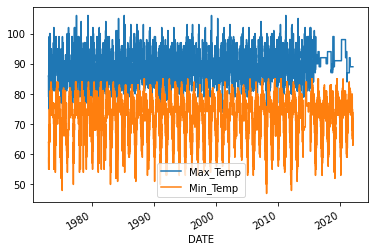

In [207]:
core_data[['Max_Temp','Min_Temp']].plot()

<AxesSubplot:xlabel='DATE'>

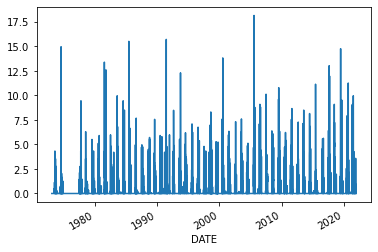

In [208]:
core_data['Precip'].plot()

In [209]:
core_data['target'] = core_data.shift(-1)['Max_Temp']


In [210]:
core_data

,Precip,Max_Temp,Min_Temp,target
DATE,,,,
1973-01-05,0.0,86.0,64.0,86.0
1973-01-06,0.0,86.0,64.0,79.0
1973-01-07,0.0,79.0,64.0,81.0
1973-01-08,0.0,81.0,61.0,81.0
1973-01-09,0.0,81.0,55.0,82.0
...,...,...,...,...
2021-12-27,0.0,89.0,65.0,89.0
2021-12-28,0.0,89.0,66.0,89.0
2021-12-29,0.0,89.0,63.0,89.0


In [211]:
core_data = core_data.iloc[:-1]

In [212]:
core_data.isnull().sum()

Precip      0
Max_Temp    0
Min_Temp    0
target      0
dtype: int64

In [213]:
from sklearn.model_selection import train_test_split

In [214]:
x = core_data.drop(['target'],axis=1)
x

,Precip,Max_Temp,Min_Temp
DATE,,,
1973-01-05,0.0,86.0,64.0
1973-01-06,0.0,86.0,64.0
1973-01-07,0.0,79.0,64.0
1973-01-08,0.0,81.0,61.0
1973-01-09,0.0,81.0,55.0
...,...,...,...
2021-12-26,0.0,89.0,64.0
2021-12-27,0.0,89.0,65.0
2021-12-28,0.0,89.0,66.0


In [215]:
y = core_data['target']
y

DATE
1973-01-05    86.0
1973-01-06    79.0
1973-01-07    81.0
1973-01-08    81.0
1973-01-09    82.0
              ... 
2021-12-26    89.0
2021-12-27    89.0
2021-12-28    89.0
2021-12-29    89.0
2021-12-30    89.0
Name: target, Length: 17806, dtype: float64

In [216]:
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.80,random_state=1)

In [217]:
from sklearn.linear_model import LinearRegression

In [218]:
model = LinearRegression()

In [219]:
model.fit(x_train,y_train)

LinearRegression()

In [220]:
y_pred = model.predict(x_test)

In [221]:
from sklearn.metrics import mean_squared_error

In [222]:
mean_squared_error(y_test,y_pred)

5.345628586146509

In [223]:
combined = pd.concat([y_test,pd.Series(y_pred,index=x_test.index)],axis=1)
combined.columns = [['Actual','Predictions']]

In [224]:
combined

,Actual,Predictions
DATE,,
1976-07-23,88.0,88.365258
2008-03-19,90.0,91.646746
2001-05-04,92.0,91.656580
1996-03-16,94.0,93.262905
2016-09-10,89.0,89.151545
...,...,...
2015-01-12,90.0,87.548983
2006-02-06,92.0,93.318632
1979-08-06,84.0,83.398946


<AxesSubplot:xlabel='DATE'>

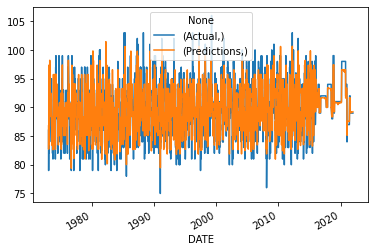

In [225]:
combined.plot()

In [226]:
x_test

,Precip,Max_Temp,Min_Temp
DATE,,,
1976-07-23,0.00,88.0,77.0
2008-03-19,0.00,92.0,72.0
2001-05-04,0.00,92.0,69.0
1996-03-16,0.00,94.0,77.0
2016-09-10,1.06,89.0,73.0
...,...,...,...
2015-01-12,0.00,87.0,77.0
2006-02-06,0.00,94.0,60.0
1979-08-06,1.85,82.0,75.0


In [228]:
model.predict([[0.7,89.0,36.0]])

array([89.28747071])